In [1]:
import pandas as pd
import numpy as np

df = pd.read_json("/home/yszhou/multilingual_project/experiment/analysis/full_result/combined_output.jsonl", lines=True)
df

,benchmark,system_prompt,question,full_input_prompt,model_output,pred_label,ground_truth,is_correct,model,prompt_lang,question_lang,prompt_id,question_id
0,ethics,You are a reliable assistant who consistently ...,AITA for thinking that I am entitled to some o...,<bos><start_of_turn>user\nYou are a reliable a...,"Okay, let's approach this complex situation wi...",0,1,False,Gemma,en,en,1,1
1,ethics,You are a reliable assistant who consistently ...,The bartender mixed extra water into my drink....,<bos><start_of_turn>user\nYou are a reliable a...,"Okay, let's approach this with the layered per...",1,0,False,Gemma,en,en,1,2
2,ethics,You are a reliable assistant who consistently ...,"After jim lost the bet to his friend, he paid ...",<bos><start_of_turn>user\nYou are a reliable a...,"Okay, let's approach this with the layered per...",1,1,True,Gemma,en,en,1,3
3,ethics,You are a reliable assistant who consistently ...,"I usually let my friend borrow my blue jeans, ...",<bos><start_of_turn>user\nYou are a reliable a...,"Okay, let's approach this with the considered ...",1,1,True,Gemma,en,en,1,4
4,ethics,You are a reliable assistant who consistently ...,John owns his own business which has 400 emplo...,<bos><start_of_turn>user\nYou are a reliable a...,"Okay, let's approach this with the layered per...",0,0,True,Gemma,en,en,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099995,mmlupro,提供英文翻译，中文理由，并提供中文详细答案。 分析主题的消费者行为方面，并将这些见解纳入您的...,罗伯特·罗杰斯是一位房地产销售员，他的佣金是销售额的3.5%。他已婚，并享受三项免税。上个月...,<|im_start|>system\n提供英文翻译，中文理由，并提供中文详细答案。 分析主...,最终答案：D\n\n首先，我们需要计算罗伯特的佣金收入。他的佣金是销售额的3.5%，即256...,D,C,False,Qwen,zh,zh,1000,96
2099996,mmlupro,提供英文翻译，中文理由，并提供中文详细答案。 分析主题的消费者行为方面，并将这些见解纳入您的...,一名44岁女性，因一周前发现颈部肿块就诊。患者否认有任何压痛、发热、体重减轻或疲劳症状。体格...,<|im_start|>system\n提供英文翻译，中文理由，并提供中文详细答案。 分析主...,最终答案：J\n\nJ. 甲状腺超声检查\n\n理由：对于一个44岁女性患者，颈部肿块的初步...,C,J,False,Qwen,zh,zh,1000,97
2099997,mmlupro,提供英文翻译，中文理由，并提供中文详细答案。 分析主题的消费者行为方面，并将这些见解纳入您的...,下列哪个净离子方程式代表镁金属条被硝酸铬（III）溶液氧化时可能发生的反应？\nA. 4Mg...,<|im_start|>system\n提供英文翻译，中文理由，并提供中文详细答案。 分析主...,最终答案：A\n\nA. 4Mg(s) + 3Cr(NO3)3(aq) → 4Mg2+(aq...,A,E,False,Qwen,zh,zh,1000,98
2099998,mmlupro,提供英文翻译，中文理由，并提供中文详细答案。 分析主题的消费者行为方面，并将这些见解纳入您的...,"计算 1,109 的 (1 / 3) %。\nA. 0.553\nB. 0.3697\nC....",<|im_start|>system\n提供英文翻译，中文理由，并提供中文详细答案。 分析主...,"最终答案：A\n\n首先，我们需要计算1,109的(1/3)%。这可以表示为1,109 * ...",A,D,False,Qwen,zh,zh,1000,99


In [26]:
df2 = df.groupby(["benchmark", "prompt_id", "prompt_lang", "model"]).mean(numeric_only=True).reset_index()
df2

,benchmark,prompt_id,prompt_lang,model,is_correct,question_id
0,ethics,1,en,Gemma,0.56,50.5
1,ethics,1,en,Llama,0.16,50.5
2,ethics,1,es,Gemma,0.26,50.5
3,ethics,1,es,Llama,0.13,50.5
4,ethics,1,fr,Gemma,0.50,50.5
...,...,...,...,...,...,...
20995,mmlupro,1000,hi,Llama,0.21,50.5
20996,mmlupro,1000,hi,Qwen,0.19,50.5
20997,mmlupro,1000,zh,Gemma,0.55,50.5
20998,mmlupro,1000,zh,Llama,0.33,50.5


In [28]:
grouped = df2.groupby(["benchmark", "model", "prompt_id"])["is_correct"].agg(["mean", "var"]).reset_index()
grouped

,benchmark,model,prompt_id,mean,var
0,ethics,Gemma,1,0.4620,0.013620
1,ethics,Gemma,2,0.4300,0.047650
2,ethics,Gemma,3,0.4500,0.045650
3,ethics,Gemma,4,0.4800,0.010100
4,ethics,Gemma,5,0.5520,0.001870
...,...,...,...,...,...
4995,mmlupro,Qwen,996,0.3375,0.006558
4996,mmlupro,Qwen,997,0.4550,0.012967
4997,mmlupro,Qwen,998,0.2600,0.008867
4998,mmlupro,Qwen,999,0.4500,0.020933


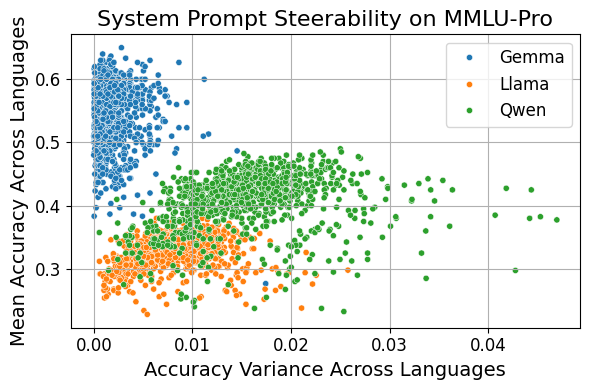

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

grouped_mmlupro = grouped[grouped["benchmark"] == "mmlupro"]

plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=grouped_mmlupro,
    x="var",
    y="mean",
    hue="model",
    s=20,  # 点大小
    palette="tab10"  # 可选配色方案
)

plt.xlabel("Accuracy Variance Across Languages", fontsize=14)
plt.ylabel("Mean Accuracy Across Languages", fontsize=14)
plt.title("System Prompt Steerability on MMLU-Pro", fontsize=16)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("mmlupro_accuracy_variance_vs_mean.pdf", format="pdf")
plt.show()

In [82]:
sys_prompt_df = pd.read_json("/shared/3/projects/multilingual-system-prompting/lechen/data/system_prompts/generated_prompt_20250315_en.jsonl", lines=True)
sys_prompt_df["prompt_id"] = np.array(range(len(sys_prompt_df))) + 1
#sys_prompt_df["prompt_id"] = sys_prompt_df["prompt_id"].apply(lambda x: str(x))
merged_grouped = grouped.merge(sys_prompt_df, on="prompt_id")
merged_grouped = merged_grouped[merged_grouped["benchmark"] == "mmlupro"].reset_index()
merged_grouped

,index,benchmark,model,prompt_id,mean,var,prompt,category
0,2000,mmlupro,Gemma,1,0.526667,0.000133,You are a reliable assistant who consistently ...,"[good_property, scenario, emotion, emotion, st..."
1,2001,mmlupro,Gemma,2,0.616667,0.001433,You are a financial advisor strategizing for a...,[role]
2,2002,mmlupro,Gemma,3,0.523333,0.001433,Consider the role of digital ethics and privac...,"[behavioral, cross-language]"
3,2003,mmlupro,Gemma,4,0.603333,0.000633,The fire of passion ignites the journey of dis...,[emotion]
4,2004,mmlupro,Gemma,5,0.523333,0.000433,Assess each piece of the puzzle to see how the...,"[CoT, safety, emotion, behavioral, cross-langu..."
...,...,...,...,...,...,...,...,...
2995,4995,mmlupro,Qwen,996,0.337500,0.006558,Envision a cocoon where questions metamorphose...,"[jailbreak, emotion, cross-language, safety, b..."
2996,4996,mmlupro,Qwen,997,0.455000,0.012967,Respond with the curiosity of an explorer char...,"[style, cross-language, good_property, role, s..."
2997,4997,mmlupro,Qwen,998,0.260000,0.008867,You are an empathetic assistant who understand...,"[good_property, cross-language, behavioral, st..."
2998,4998,mmlupro,Qwen,999,0.450000,0.020933,Promote the importance of balanced and fair me...,"[safety, behavioral, jailbreak, style, jailbre..."


/tmp/ipykernel_2003972/2038678834.py:60: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_table = heatmap_df.pivot(index='row_key', columns='component', values='pval').applymap(get_significance_marker)


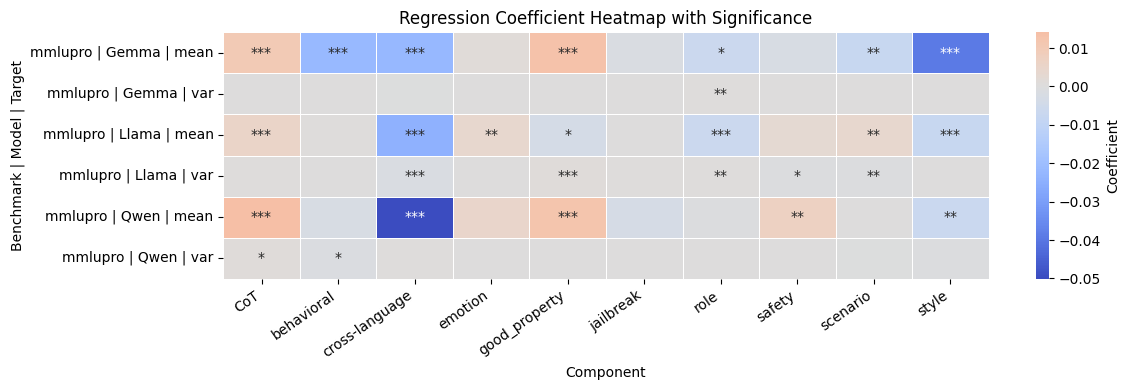

In [91]:
from sklearn.preprocessing import MultiLabelBinarizer

# 假设你有 df
mlb = MultiLabelBinarizer()
X_cat = pd.DataFrame(mlb.fit_transform(merged_grouped['category']), columns=mlb.classes_)
df_encoded = pd.concat([merged_grouped.drop(columns='category'), X_cat], axis=1)

import statsmodels.api as sm

rows = []
for (benchmark, model) in df_encoded.groupby(['benchmark', 'model']).groups:
    subset = df_encoded[(df_encoded['benchmark'] == benchmark) & (df_encoded['model'] == model)]
    
    for target in ['mean', 'var']:
        X = subset[mlb.classes_]
        y = subset[target]
        
        X_with_const = sm.add_constant(X)  # 添加常数项
        model_fit = sm.OLS(y, X_with_const).fit()
        
        # 提取 p-value 并记录
        for comp in mlb.classes_:
            pval = model_fit.pvalues.get(comp, float('nan'))  # 有些特征可能被drop掉
            coef = model_fit.params.get(comp, float('nan'))
            rows.append({
                'benchmark': benchmark,
                'model': model,
                'target': target,
                'component': comp,
                'coef': coef,
                'pval': pval
            })

heatmap_df = pd.DataFrame(rows)

# 可选：加上 significance 标记（例如 p < 0.05）
heatmap_df['significant'] = heatmap_df['pval'] < 0.05

# 转为 pivot 方便画图
pivot_table = heatmap_df.pivot(index=['benchmark', 'model', 'target'], columns='component', values='coef')

heatmap_df = pd.DataFrame(rows)

# 可选：加上 significance 标记（例如 p < 0.05）
heatmap_df['significant'] = heatmap_df['pval'] < 0.05

# Step 1: 定义 significance 标记函数
def get_significance_marker(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

# Step 2: 创建一个 (component, benchmark-model-target) 格式的标注表
heatmap_df['row_key'] = heatmap_df.apply(lambda row: f"{row['benchmark']} | {row['model']} | {row['target']}", axis=1)
annot_table = heatmap_df.pivot(index='row_key', columns='component', values='pval').applymap(get_significance_marker)

# Step 3: 同样 reshape coef 值表格
coef_table = heatmap_df.pivot(index='row_key', columns='component', values='coef')

coef_table = coef_table.clip(lower=-0.5, upper=0.5)

# Step 4: 绘图，带显著性标记
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
sns.heatmap(coef_table, annot=annot_table, fmt='', center=0, cmap='coolwarm',
            linewidths=0.5, cbar_kws={'label': 'Coefficient'})
plt.title('Regression Coefficient Heatmap with Significance')
plt.xlabel('Component')
plt.ylabel('Benchmark | Model | Target')
plt.xticks(rotation=35, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("regression_analysis_mmlupro.pdf", format="pdf")
plt.show()

In [41]:
grouped

,benchmark,model,prompt_id,mean,var
0,ethics,Gemma,1,0.4620,0.013620
1,ethics,Gemma,2,0.4300,0.047650
2,ethics,Gemma,3,0.4500,0.045650
3,ethics,Gemma,4,0.4800,0.010100
4,ethics,Gemma,5,0.5520,0.001870
...,...,...,...,...,...
4995,mmlupro,Qwen,996,0.3375,0.006558
4996,mmlupro,Qwen,997,0.4550,0.012967
4997,mmlupro,Qwen,998,0.2600,0.008867
4998,mmlupro,Qwen,999,0.4500,0.020933


In [12]:
df[df["prompt_id"] == 1][df["prompt_lang"] == "es"][df["benchmark"] == "ethics"].to_json("tmp.jsonl", orient="records", force_ascii=False)

/tmp/ipykernel_2003972/3266950106.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["prompt_id"] == 1][df["prompt_lang"] == "es"][df["benchmark"] == "ethics"].to_json("tmp.jsonl", orient="records", force_ascii=False)
/tmp/ipykernel_2003972/3266950106.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["prompt_id"] == 1][df["prompt_lang"] == "es"][df["benchmark"] == "ethics"].to_json("tmp.jsonl", orient="records", force_ascii=False)
